# ACTIVIDAD 1 - BÚSQUEDA (Algoritmos DFS, BFS, Greedy, A*)

Librerías que utilizaremos para realizar la actividad:

In [100]:
import osmnx as ox
import random
import heapq
import math 

## Carga del mapa y estilos
Aquí deberán cargar el mapa en la ubicación que deseen, con la funcion ```python ox.graph_from_place``` obtendremos un grafo dirigido con la información del mapa, incluidos sus nodos y aristas (calles que unen los nodos)

In [101]:
lugar = "Maipú, Mendoza, Argentina" # Ej: "Godoy Cruz, Mendoza, Argentina"
G = ox.graph_from_place(lugar, network_type="drive")

Funciones para dar estilo al mapa, pueden modificar colores y tamaños de los elementos, o ignorar esta celda si no desean modificar el estilo del mapa.

In [102]:
def arista_no_visitada(edge):        
    G.edges[edge]["color"] = "#22609b"
    G.edges[edge]["alpha"] = 0.2
    G.edges[edge]["linewidth"] = 0.5

def arista_visitada(edge):
    G.edges[edge]["color"] = "#22609b"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def arista_activa(edge):
    G.edges[edge]["color"] = 'lightblue'
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

def arista_solucion(edge):
    G.edges[edge]["color"] = "white"
    G.edges[edge]["alpha"] = 1
    G.edges[edge]["linewidth"] = 1

Función que modifica el gráfico para aplicar los estilos que vayamos dando a cada nodo o arista

In [103]:
def plot_graph():
    ox.plot_graph(
        G,
        node_size =  [ G.nodes[node]["size"] for node in G.nodes ],
        edge_color = [ G.edges[edge]["color"] for edge in G.edges ],
        edge_alpha = [ G.edges[edge]["alpha"] for edge in G.edges ],
        edge_linewidth = [ G.edges[edge]["linewidth"] for edge in G.edges ],
        node_color = "white",
        bgcolor = "#001028"
    )

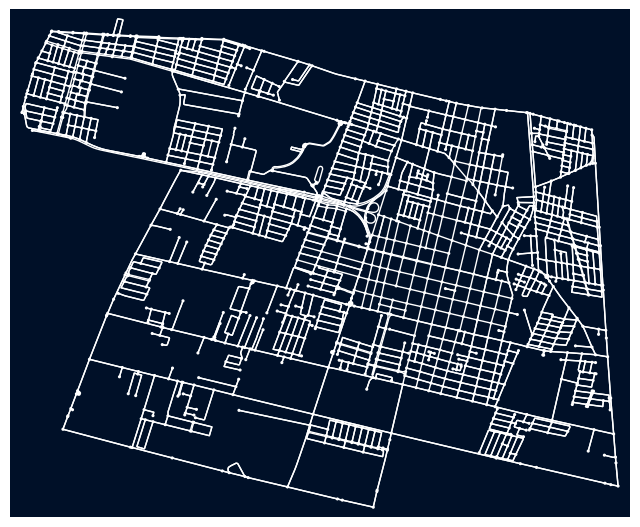

In [104]:
for node in G.nodes:
    G.nodes[node]["size"] = 5

for edge in G.edges: 
    arista_solucion(edge)

plot_graph()

## Implementación de los algoritmos
En todos los casos, las funciones recibirán el grafo G, el nodo de inicio y el nodo de la meta

### Búsqueda no informada

In [128]:
def dfs(G, inicio, meta):
    # Implementar el algoritmo Depth-First Search
    # Pista: utilizar los 5 pasos que vimos en clase para ir explorando los nodos
    # 1) Dar estilo a nodos y aristas (estilos iniciales)
    # 2) Los nodos presentan son diccionarios con las siguientes claves:
    #   - "y": coordenadas y del nodo
    #   - "x": coordenadas x del nodo
    #   - "street_count": numero de calles que salen del nodo
    # 3) Para dar los estilos iniciales, todos los nodos deberian tener un size de 0, a menos que sean el inicio o la meta,
    # en ese caso dar un poco mas de tamaño para que sean visibles en el mapa
    # 4) Todos los nodos deberán tener un nodo "padre" (para el incio, el padre es None)
    # 5) Inicializar la frontera con el nodo inicial dentro
    # 6) Inicializar lista de nodos explorados
    # 7) Bucle principal (revisar teoria)

    # Estilos
    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30

    # Estilo de no visitada 
    for edge in G.edges:
        arista_no_visitada(edge)

    frontera = [inicio]
    explorados = []

    while True:
        # Esta consicional quiere decir que no hay solución
        if len(frontera) == 0:
            print("La frontera está vacía. No hay solución")
            break

        nodo_actual = frontera.pop()

        if nodo_actual == meta:
            print("Meta alcanzada")
            solucion = []
            while nodo_actual is not None: # nodo_actual es la meta, es el último nodo
                solucion.append(G.nodes[nodo_actual]["padre"])
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.pop()
            solucion.reverse()
            return solucion, explorados

        # [(5283138480, 5283138479), (5283138480, 5283138474), (5283138480, 5283138475)] [(nodo_actual, vecino), (nodo_actual, vecino_2), ...]
        # Exploramos las calles vecinas
        for arista in G.out_edges(nodo_actual):
            # Para llamar un nodo necesitamos tres valores: nodo incial, nodo de destino y 0
            arista_visitada((arista[0], arista[1], 0))
            vecino = arista[1]
            if vecino not in explorados and vecino not in frontera:
                G.nodes[vecino]["padre"] = nodo_actual
                frontera.append(vecino)
                arista_activa((arista[0], arista[1], 0))

        explorados.append(nodo_actual)

In [129]:
def bfs(G, inicio, meta):
    # Implementar el algoritmo Breadth-First Search
    # Pista: este algoritmo es igual que DFS, pero presenta una diferencia en el funcionamiento de la frontera
    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30

    # Estilo de no visitada 
    for edge in G.edges:
        arista_no_visitada(edge)

    frontera = [inicio]
    explorados = []

    while True:
        # Esta consicional quiere decir que no hay solución
        if len(frontera) == 0:
            print("La frontera está vacía. No hay solución")
            break

        nodo_actual = frontera.pop(0)

        if nodo_actual == meta:
            print("Meta alcanzada")
            solucion = []
            while nodo_actual is not None: # nodo_actual es la meta, es el último nodo
                solucion.append(G.nodes[nodo_actual]["padre"])
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.pop()
            solucion.reverse()
            return solucion, explorados
        
        # [(5283138480, 5283138479), (5283138480, 5283138474), (5283138480, 5283138475)] [(nodo_actual, vecino), (nodo_actual, vecino_2), ...]
        # Exploramos las calles vecinas
        for arista in G.out_edges(nodo_actual):
            # Para llamar un nodo necesitamos tres valores: nodo incial, nodo de destino y 0
            arista_visitada((arista[0], arista[1], 0))
            vecino = arista[1]
            if vecino not in explorados and vecino not in frontera:
                G.nodes[vecino]["padre"] = nodo_actual
                frontera.append(vecino)
                arista_activa((arista[0], arista[1], 0))

        explorados.append(nodo_actual)

### Búsqueda informada

In [107]:
def heuristica(nodo_1, nodo_2):
    x1, y1 = G.nodes[nodo_1]["x"], G.nodes[nodo_1]["y"]
    x2, y2 = G.nodes[nodo_1]["x"], G.nodes[nodo_1]["y"]

    distancia = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    return distancia

In [155]:
def gbfs(G, inicio, meta, h):
    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30

    # Estilo de no visitada 
    for edge in G.edges:
        arista_no_visitada(edge)

    frontera = [(h(inicio, meta), inicio)]
    explorados = []

    while frontera:
        _, nodo_actual = heapq.heappop(frontera)

        if nodo_actual == meta:
            solucion = []
            while nodo_actual is not None: 
                solucion.append(nodo_actual)
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.reverse()
            return solucion, explorados
        
        for arista in G.out_edges(nodo_actual):
            arista_visitada((arista[0], arista[1], 0))
            vecino = arista[1]
            if vecino not in explorados:
                G.nodes[vecino]["padre"] = nodo_actual
                heapq.heappush(frontera, (h(vecino, meta), vecino))
            arista_activa((arista[0], arista[1], 0))

        explorados.append(nodo_actual)

In [123]:
def a_estrella(G, inicio, meta, h):
    # Implementar el algoritmo A*
    # Pista: mismo enfoque que GBFS, pero deben implementar el costo de llegar a un nodo específico, ademas de la heurística
    for node in G.nodes:
        G.nodes[node]["size"] = 0
        G.nodes[node]["padre"] = None
        G.nodes[node]["g"] = float('inf')
    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30
    G.nodes[inicio]["g"] = 0

    # Estilo de no visitada 
    for edge in G.edges:
        arista_no_visitada(edge)

    frontera = [(h(inicio, meta), inicio)]
    explorados = []

    while frontera:
        _, nodo_actual = heapq.heappop(frontera)

        if nodo_actual == meta:
            solucion = []
            while nodo_actual is not None: 
                solucion.append(nodo_actual)
                nodo_actual = G.nodes[nodo_actual]["padre"]
            solucion.reverse()
            break
        
    for arista in G.out_edges(nodo_actual):
        arista_visitada((arista[0], arista[1], 0))
        vecino = arista[1]
        if vecino not in explorados:
            g_temp = G.nodes[nodo_actual]["g"] + 1
            if g_temp < G.nodes[vecino]["g"]:
                G.nodes[vecino]["padre"] = nodo_actual
                G.nodes[vecino]["g"] = g_temp
                f = g_temp + h(vecino, meta)
                heapq.heappush(frontera, (f, vecino))
                arista_activa((arista[0], arista[1], 0))

    explorados.append(nodo_actual)

In [110]:
def pintar_camino(inicio, meta):
    for calle in G.edges:
        arista_no_visitada(calle)
    nodo_actual = meta

    while nodo_actual != inicio:
        G.nodes[nodo_actual]['size'] = 0
        nodo_padre = G.nodes[nodo_actual]['padre']
        arista_solucion((nodo_padre, nodo_actual, 0))
        nodo_actual = nodo_padre

    G.nodes[inicio]['size'] = 50
    G.nodes[meta]['size'] = 50

    plot_graph()

## Ejecución y análisis


Seleccionamos dos nodos del grafo al azar utilizando random:

In [111]:
def dibujar_solucion(inicio, meta):
    for arista in G.edges:
        arista_no_visitada(arista) # out_edges -> (nodo_origen, nodo_destino, 0)
    nodo_actual = meta
    distancia = 0

    while nodo_actual != inicio:
        G.nodes[nodo_actual]["size"] = 10
        padre = G.nodes[nodo_actual]["padre"]
        arista_solucion((padre, nodo_actual, 0))
        distancia += G.edges[(padre, nodo_actual, 0)]["length"]
        nodo_actual = padre
    print(f"Distancia recorrida: {distancia/1000}")

    G.nodes[inicio]["size"] = 30
    G.nodes[meta]["size"] = 30    

    plot_graph()

In [112]:
inicio = random.choice(list(G.nodes))
print(f"Inicio: {inicio}")
meta = random.choice(list(G.nodes))
print(f"Meta: {meta}")

Inicio: 1604443657
Meta: 5766674113


Meta alcanzada
Nodos explorados: 183
Incluidos en la solución: 272


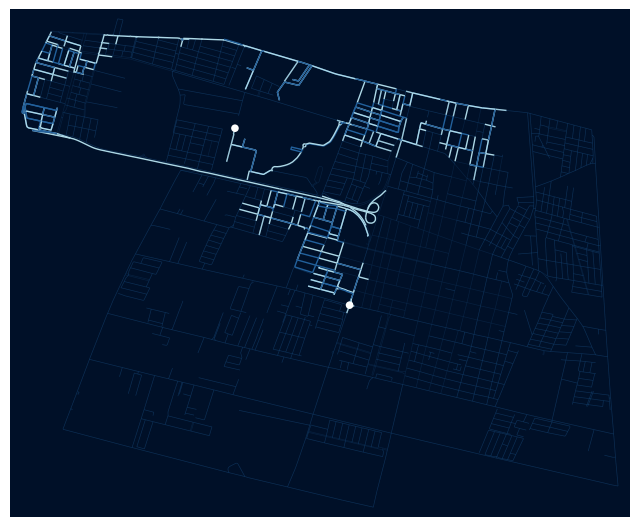

In [141]:
explorados, solucion = dfs(G, inicio, meta)

print(f'Nodos explorados: {len(explorados)}')
print(f'Incluidos en la solución: {len(solucion)}')

plot_graph()

Distancia recorrida: 19.661468


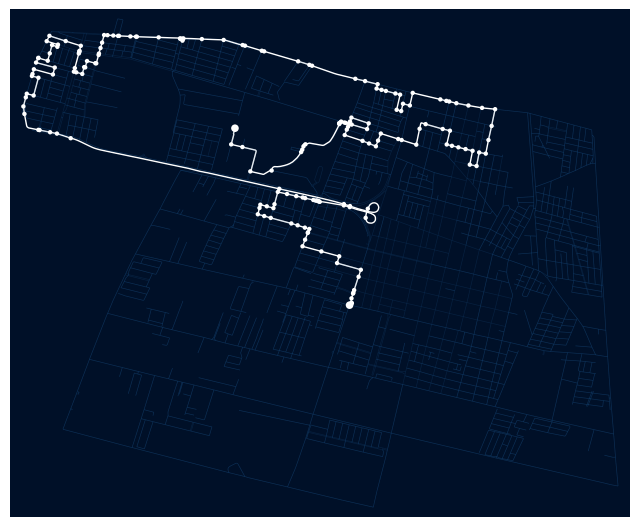

In [142]:
dibujar_solucion(inicio, meta)

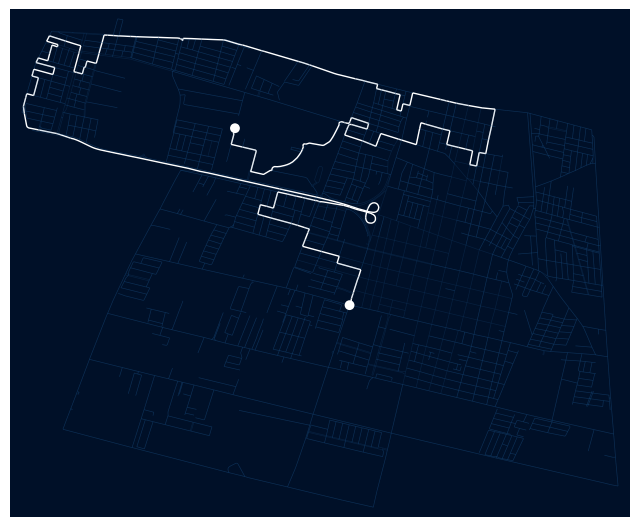

In [143]:
pintar_camino(inicio, meta)

Meta alcanzada
Nodos explorados: 25
Incluidos en la solución: 1143


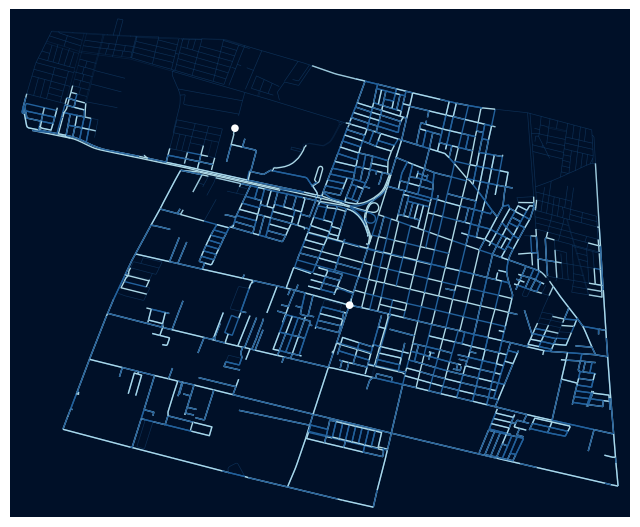

In [144]:
explorados, solucion = bfs(G, inicio, meta)

print(f'Nodos explorados: {len(explorados)}')
print(f'Incluidos en la solución: {len(solucion)}')

plot_graph()

Distancia recorrida: 3.444544000000001


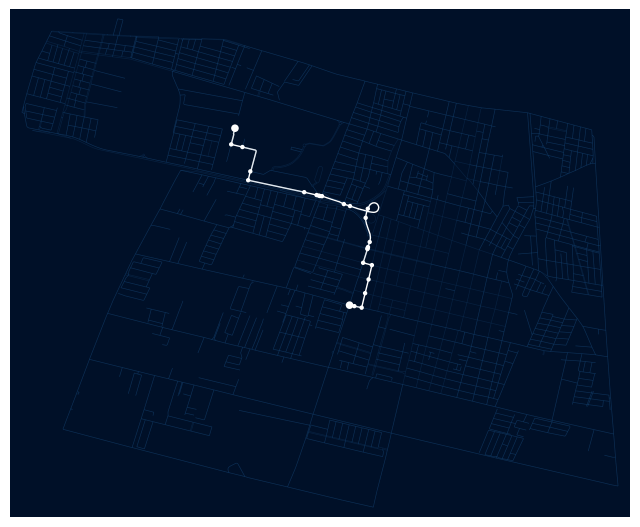

In [145]:
dibujar_solucion(inicio, meta)

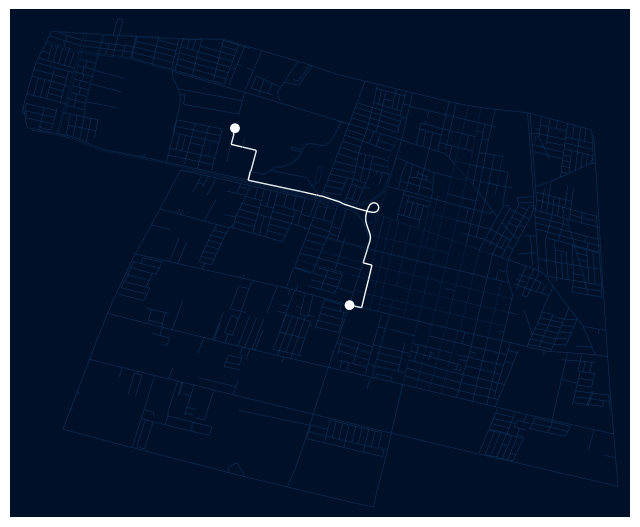

In [146]:
pintar_camino(inicio, meta)

In [157]:
explorados, solucion = gbfs(G, inicio, meta, heuristica)

print(f'Nodos explorados: {explorados}')
print(f'Incluidos en la solución: {solucion}')

plot_graph()

TypeError: cannot unpack non-iterable NoneType object

In [127]:
pintar_camino(inicio, meta)

KeyError: None

In [98]:
a_estrella(G, inicio, meta, heuristica)

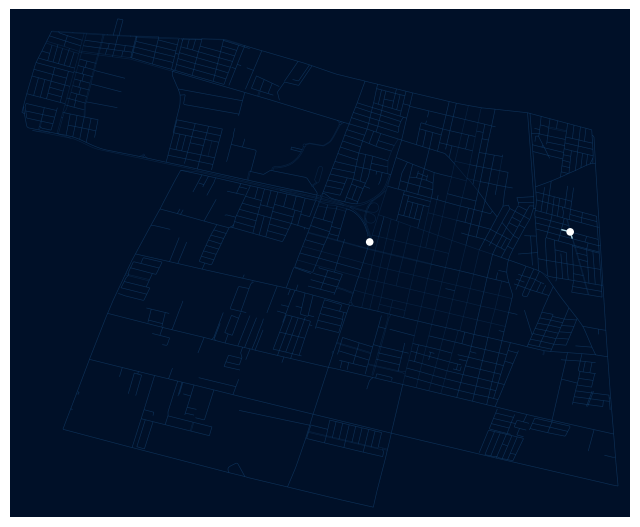

In [99]:
plot_graph()